In [133]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.filters as flt
import scipy.ndimage as img
%matplotlib inline

0.000182855471036 1.0


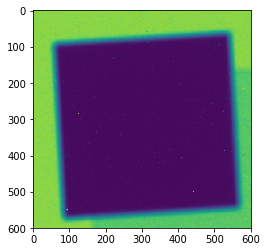

In [324]:
dc=plt.imread('../data/edges/dc.tif')
ob=plt.imread('../data/edges/ob.tif')
e=plt.imread('../data/edges/edge20mm_0007.tif')

edge=(e-dc)/(ob-dc)
edge=edge.clip(-1.0,1.0)
plt.imshow(edge,clim=[0,1.2])
print(edge.min(),edge.max())

In [325]:
def getedgeprofiles(img) :
    dedgex=np.abs(flt.edges.laplace(flt.gaussian(flt.median(img),sigma=2.5)))
    px=np.mean(dedge,0)
    py=np.mean(dedge,1)
    
    return px,py,dedgex

/Users/kaestner/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


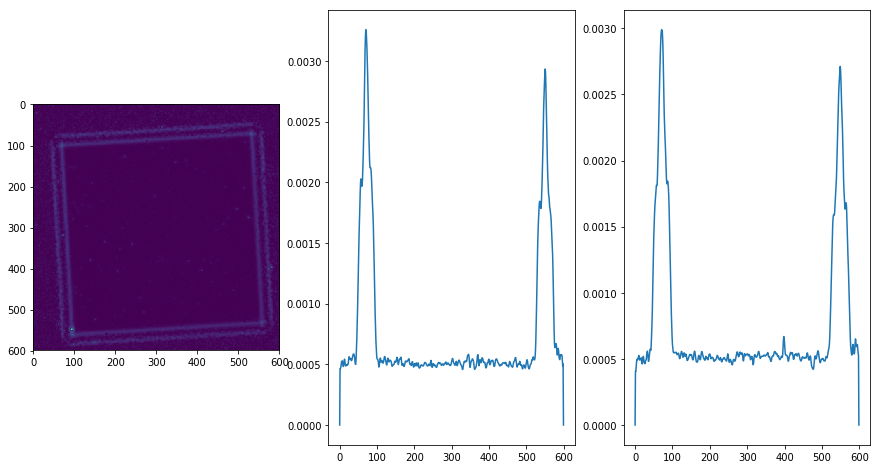

In [326]:

px,py,dedge=getedgeprofiles(edge)

plt.figure(figsize=[15,8])
plt.subplot(1,3,1)
plt.imshow(dedge)
plt.subplot(1,3,2)
plt.plot(px)
plt.subplot(1,3,3)
plt.plot(py)

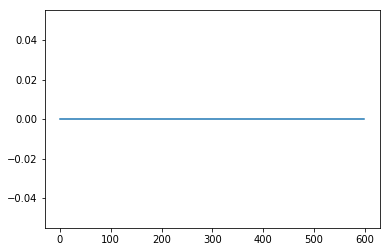

In [327]:
plt.plot(0.004<px)

In [328]:
def findedge(px,threshold) :
    px0=np.mean(np.where(threshold<px))
    px0min=np.min(np.where(threshold<px))
    px0max=np.max(np.where(threshold<px))
    width=px0max-px0min
    
    return px0, width


In [329]:
px0,w0=findedge(px[0:int(px.size/2)],0.004)
print(px0,w0)


/Users/kaestner/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/kaestner/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation minimum which has no identity

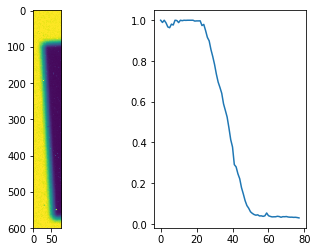

In [330]:
de0=dedge[:,int(px0-1.5*w0):int(px0+1.5*w0)]
e0=edge[:,int(px0-1.5*w0):int(px0+1.5*w0)]
plt.subplot(1,2,1)
plt.imshow(e0)
plt.subplot(1,2,2)
plt.plot(e0[300,:])

(32.884197455182168,)


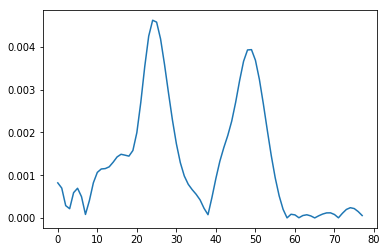

In [331]:
x=np.arange(1,79)
plt.plot(de0[300,:])
pos=img.center_of_mass(de0[300,:])
print(pos)

In [332]:
def getlinepos(e,fraction=0.8) :
    start=int(e.shape[0]*(1.0-fraction)/2.0)
    stop=e.shape[0]-start
    
    print(start,stop)
    pos = []
    rows=np.arange(start,stop)
    for r in rows :
        pos.append(img.center_of_mass(e[r,:])[0])
        
    
    return np.asarray(pos),rows
        

150 450


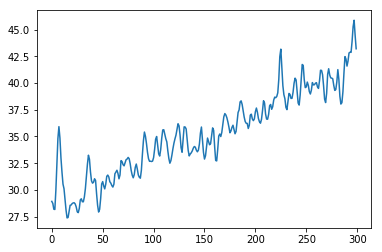

In [333]:


pos,rows=getlinepos(de0,fraction=0.5)
pos=pos
plt.plot(pos)

In [334]:
def estimateLine(pos,rows) :
    b=np.ones(shape=[pos.size])
    H=np.column_stack((rows,b))

    q=np.linalg.solve(np.matmul(H.transpose(),H),np.matmul(H.transpose(),pos))
    posest=np.matmul(H,q)
    print(q,"tilt angle",np.arctan(q[0])*180/np.pi)
    return posest

[  0.04299553  22.36274303] tilt angle 2.46194601757


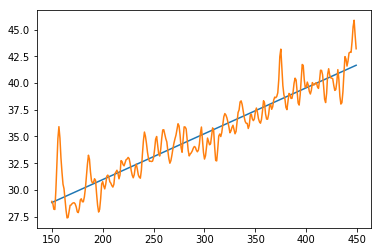

In [335]:
posest=estimateLine(pos,rows)
plt.plot(rows,posest,rows,pos)

For
$A x + B y +C = 0$
the signed distance is
$d(m,n)=\frac{A m + B n + C}{\sqrt{A^2+B^2}}$

B=-1

In [320]:
def computeDistanceField(coefs,size) :
    r,c=np.meshgrid(np.arange(0,size[0]), np.arange(0,size[1]))
    
    d=(c*coefs[0]-r+coefs[1])/np.sqrt(coefs[0]**2+1.0)
    
    return d

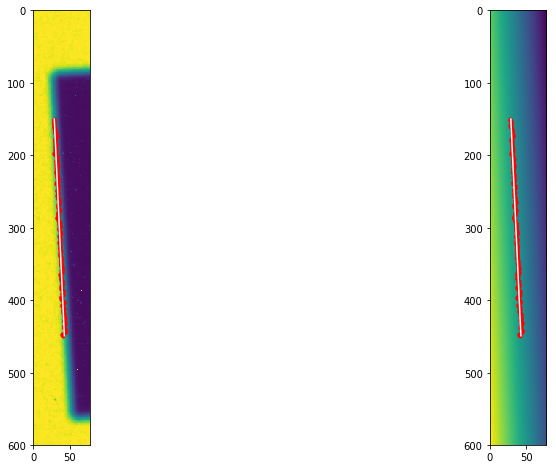

In [322]:
plt.figure(figsize=[15,8])
plt.subplot(1,2,2)
dist=computeDistanceField(q,[e0.shape[1],600])
plt.imshow(computeDistanceField(q,[e0.shape[1],600]))
plt.plot(pos,rows,'r.',posest,rows,'w')
plt.subplot(1,2,1)
plt.imshow(e0)
plt.plot(pos,rows,'r.',posest,rows,'w')